# Task 4
## EMAIL SPAM DETECTION WITH MACHINE LEARNING
We've all been the recipient of spam emails before. Spam mail, or junk mail, is a type of email that is sent to a massive number of users at one time, frequently containing cryptic messages, scams, or most dangerously, phishing content.
In this Project, use Python to build an email spam detector. Then, use machine learning to train the spam detector to recognize and classify emails into spam and non-spam. Let's get started!

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


In [117]:
# Download the stopwords resource
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\ALRWOAD
[nltk_data]     LABTOB\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to C:\Users\ALRWOAD
[nltk_data]     LABTOB\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [118]:
# Read the CSV file
df = pd.read_csv('spam.csv', encoding='latin-1')
print(df.head())


     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [119]:
# Drop unnecessary columns
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
print(df.head())

     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [120]:
# Count the occurrences of each value in the 'v1' column
print(df['v1'].value_counts())

# Print the shape of the dataframe
print(df.shape)

v1
ham     4825
spam     747
Name: count, dtype: int64
(5572, 2)


In [121]:
# Convert 'spam' to 1 and 'ham' to 0
df['v1'] = df['v1'].map({'spam': 1, 'ham': 0})
print(df['v1'])

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: v1, Length: 5572, dtype: int64


In [122]:
# Count the occurrences of each value in the 'v1' column again
print(df['v1'].value_counts())
print(df['v1'].value_counts())


v1
0    4825
1     747
Name: count, dtype: int64
v1
0    4825
1     747
Name: count, dtype: int64


In [123]:
# Count and drop duplicates
print(df.duplicated().sum())
df = df.drop_duplicates(keep='first')
print(df.duplicated().sum())

403
0


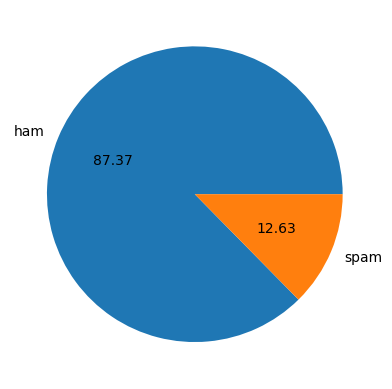

In [124]:
# Plot the distribution of the 'target' variable
df.columns = ['target', 'text']
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [125]:
# Download necessary NLTK data
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\ALRWOAD
[nltk_data]     LABTOB\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [126]:
# Add new feature columns
df['num_char'] = df['text'].apply(lambda x: len(x))
print(df.head())

df['num_word'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
print(df.head())

df['num_sent'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
print(df.head())

   target                                               text  num_char
0       0  Go until jurong point, crazy.. Available only ...       111
1       0                      Ok lar... Joking wif u oni...        29
2       1  Free entry in 2 a wkly comp to win FA Cup fina...       155
3       0  U dun say so early hor... U c already then say...        49
4       0  Nah I don't think he goes to usf, he lives aro...        61
   target                                               text  num_char  \
0       0  Go until jurong point, crazy.. Available only ...       111   
1       0                      Ok lar... Joking wif u oni...        29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...       155   
3       0  U dun say so early hor... U c already then say...        49   
4       0  Nah I don't think he goes to usf, he lives aro...        61   

   num_word  
0        24  
1         8  
2        37  
3        13  
4        15  
   target                                    

In [127]:
# Describe the dataframe
print(df.describe())

            target     num_char     num_word     num_sent
count  5169.000000  5169.000000  5169.000000  5169.000000
mean      0.126330    78.977945    18.455794     1.965564
std       0.332253    58.236293    13.324758     1.448541
min       0.000000     2.000000     1.000000     1.000000
25%       0.000000    36.000000     9.000000     1.000000
50%       0.000000    60.000000    15.000000     1.000000
75%       0.000000   117.000000    26.000000     2.000000
max       1.000000   910.000000   220.000000    38.000000


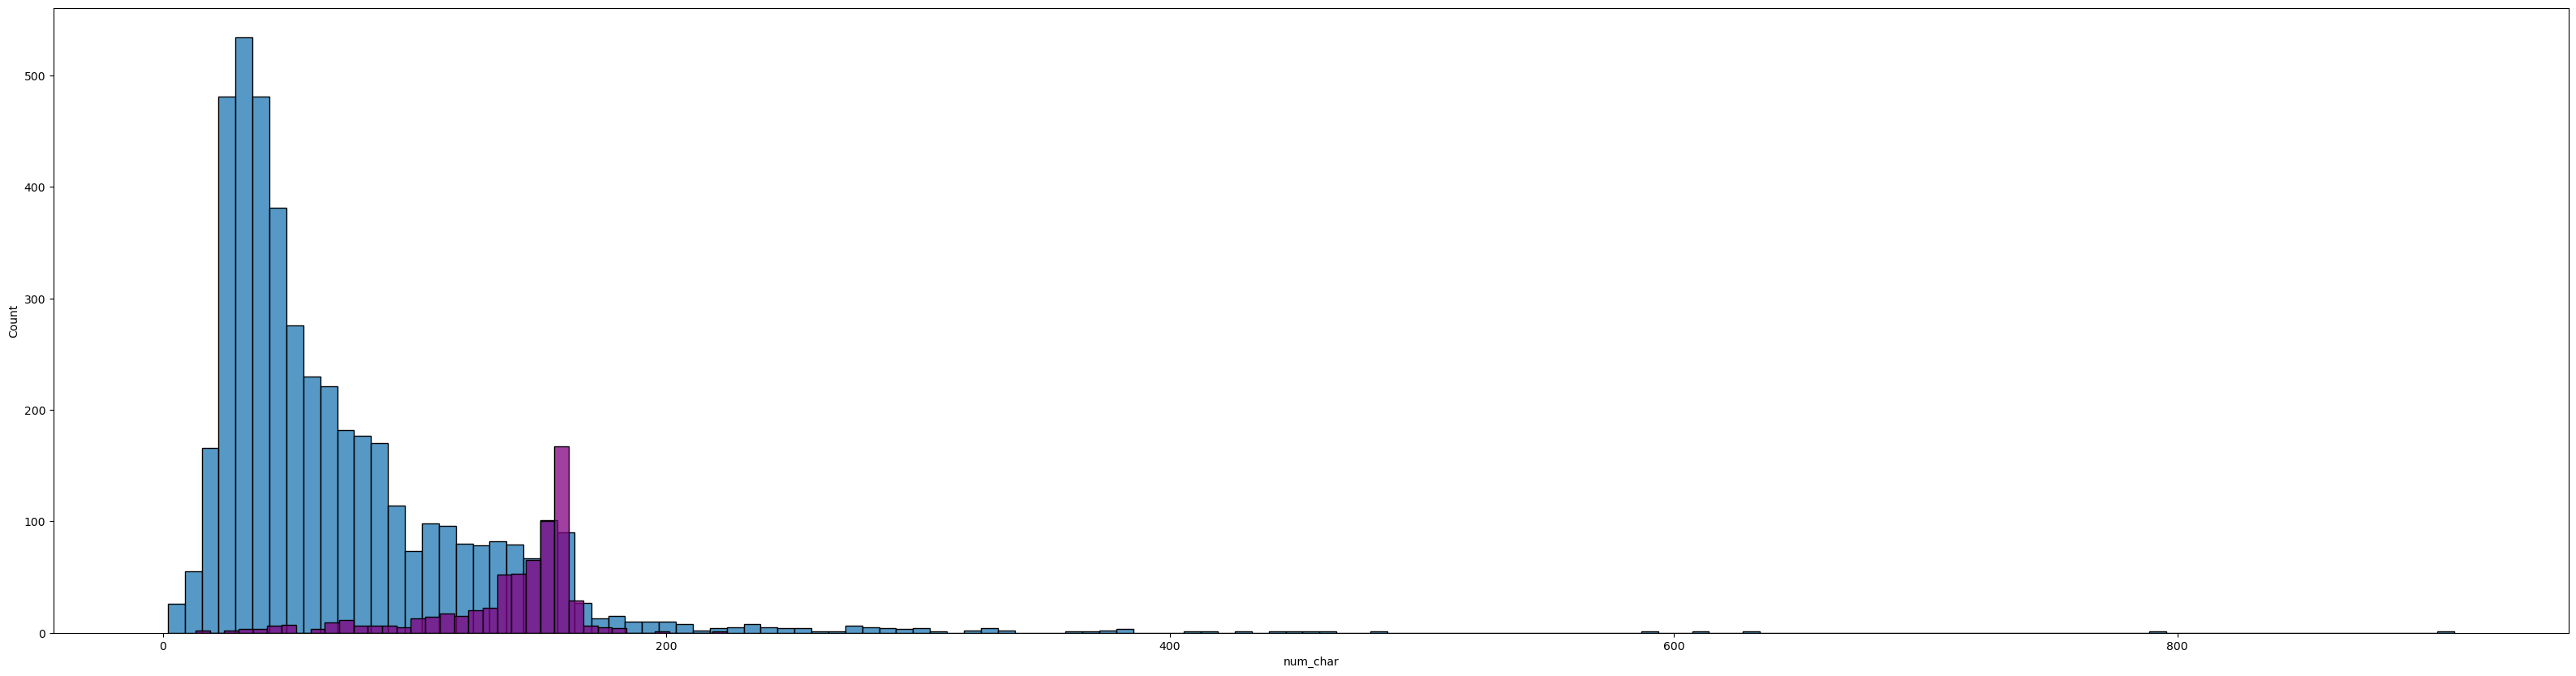

In [128]:
# Plot histograms for 'num_char'
plt.figure(figsize=(40, 10))
sns.histplot(df[df['target'] == 0]['num_char'], kde=False)
sns.histplot(df[df['target'] == 1]['num_char'], kde=False, color='purple')
plt.show()

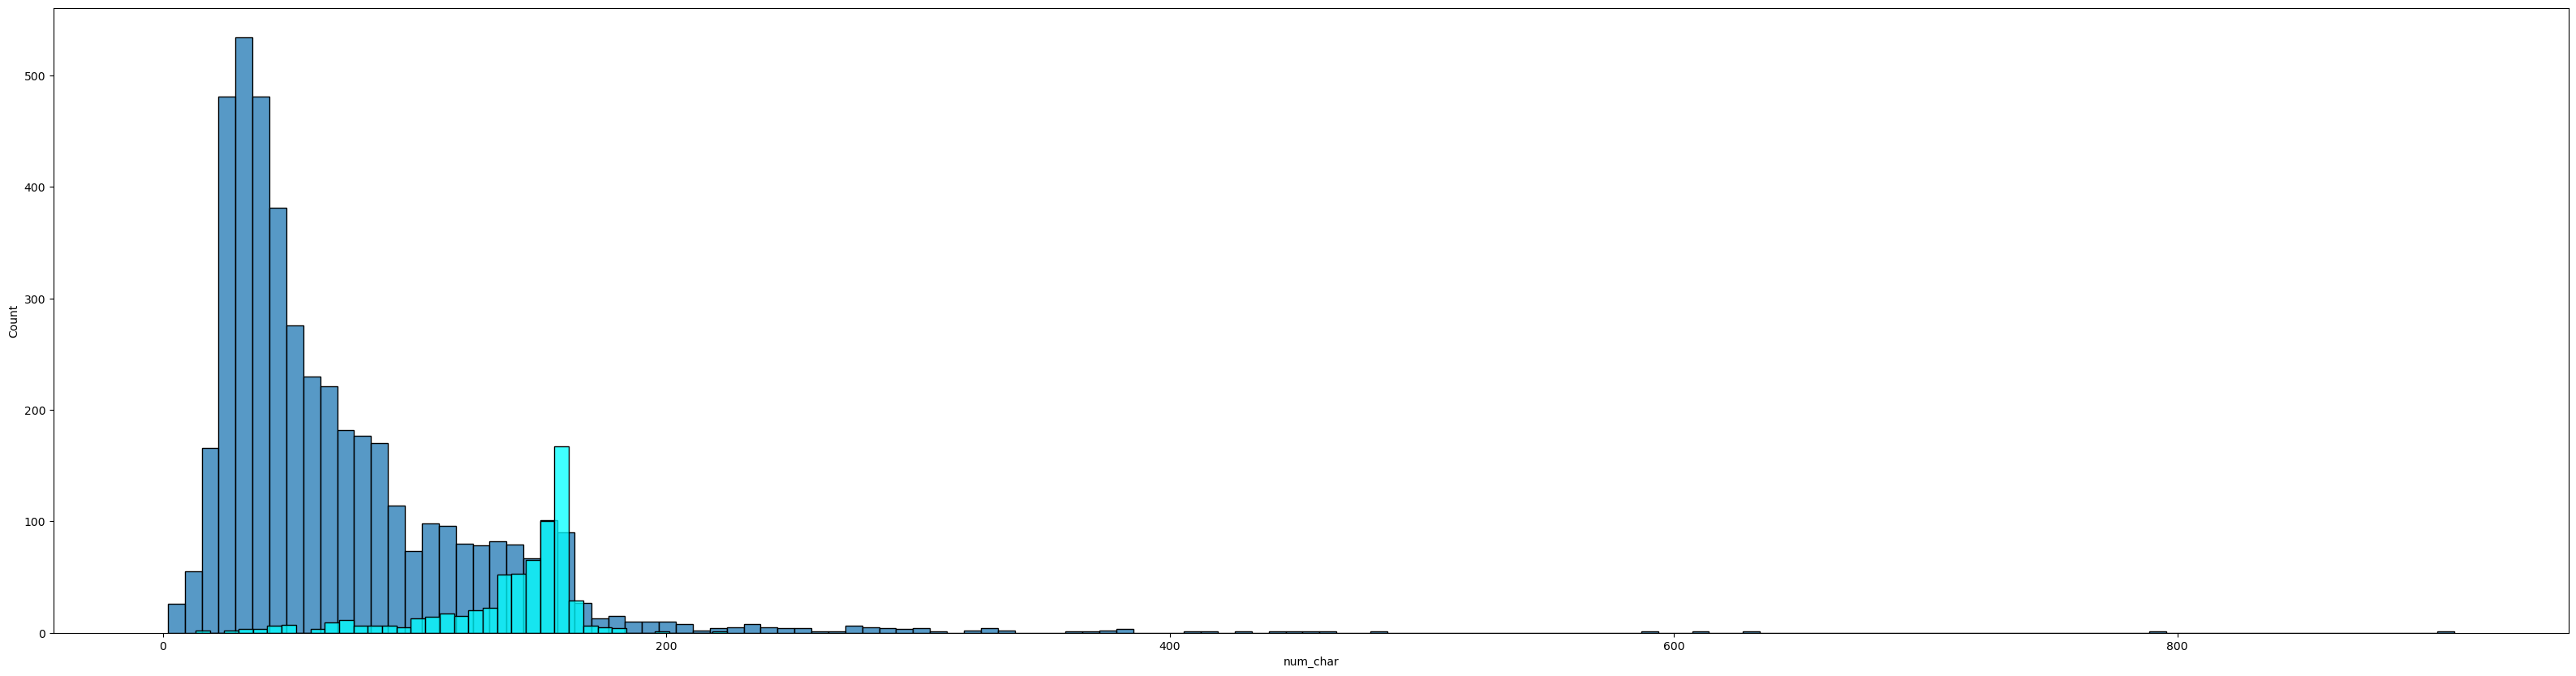

In [129]:
plt.figure(figsize=(40, 10))
sns.histplot(df[df['target'] == 0]['num_char'], kde=False)
sns.histplot(df[df['target'] == 1]['num_char'], kde=False, color='cyan')
plt.show()

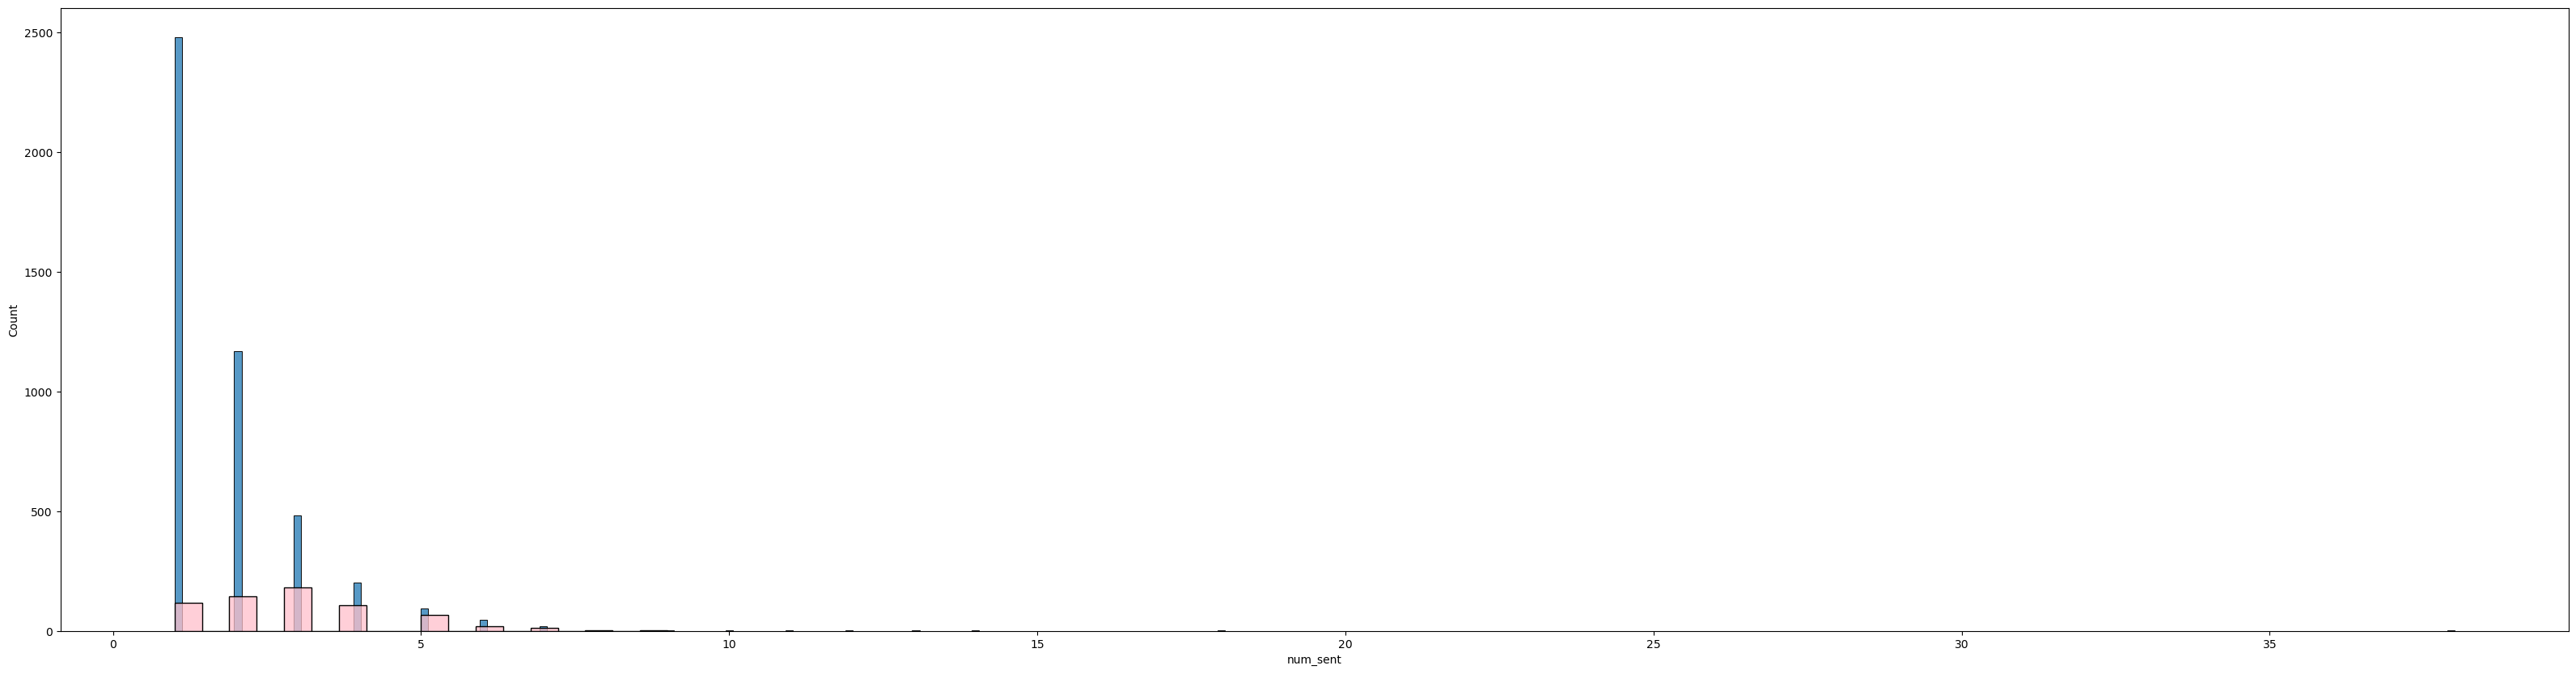

In [130]:
# Plot histograms for 'num_sent'
plt.figure(figsize=(40, 10))
sns.histplot(df[df['target'] == 0]['num_sent'], kde=False)
sns.histplot(df[df['target'] == 1]['num_sent'], kde=False, color='pink')
plt.show()


C:\Users\ALRWOAD LABTOB\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 3000x1000 with 0 Axes>

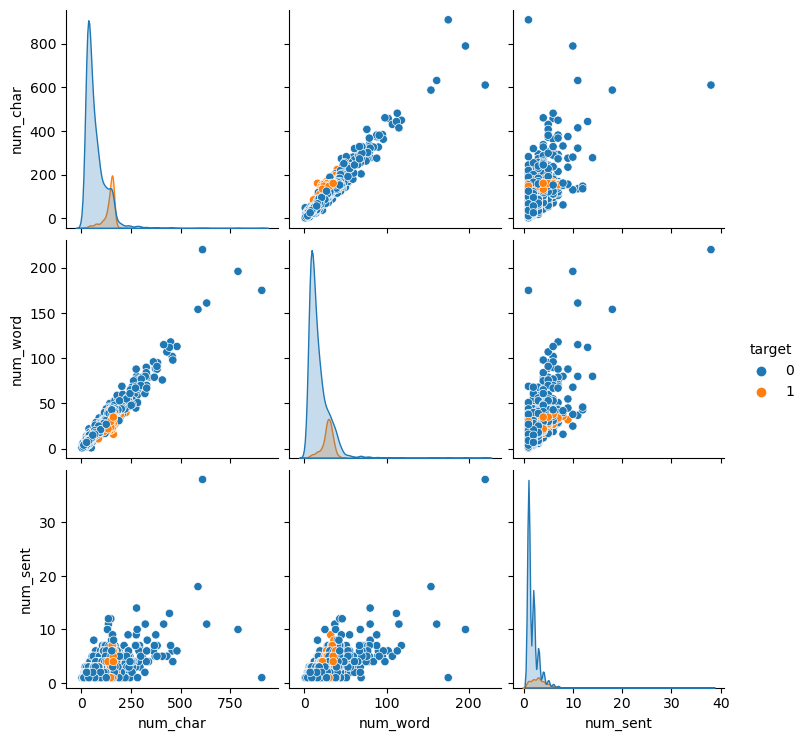

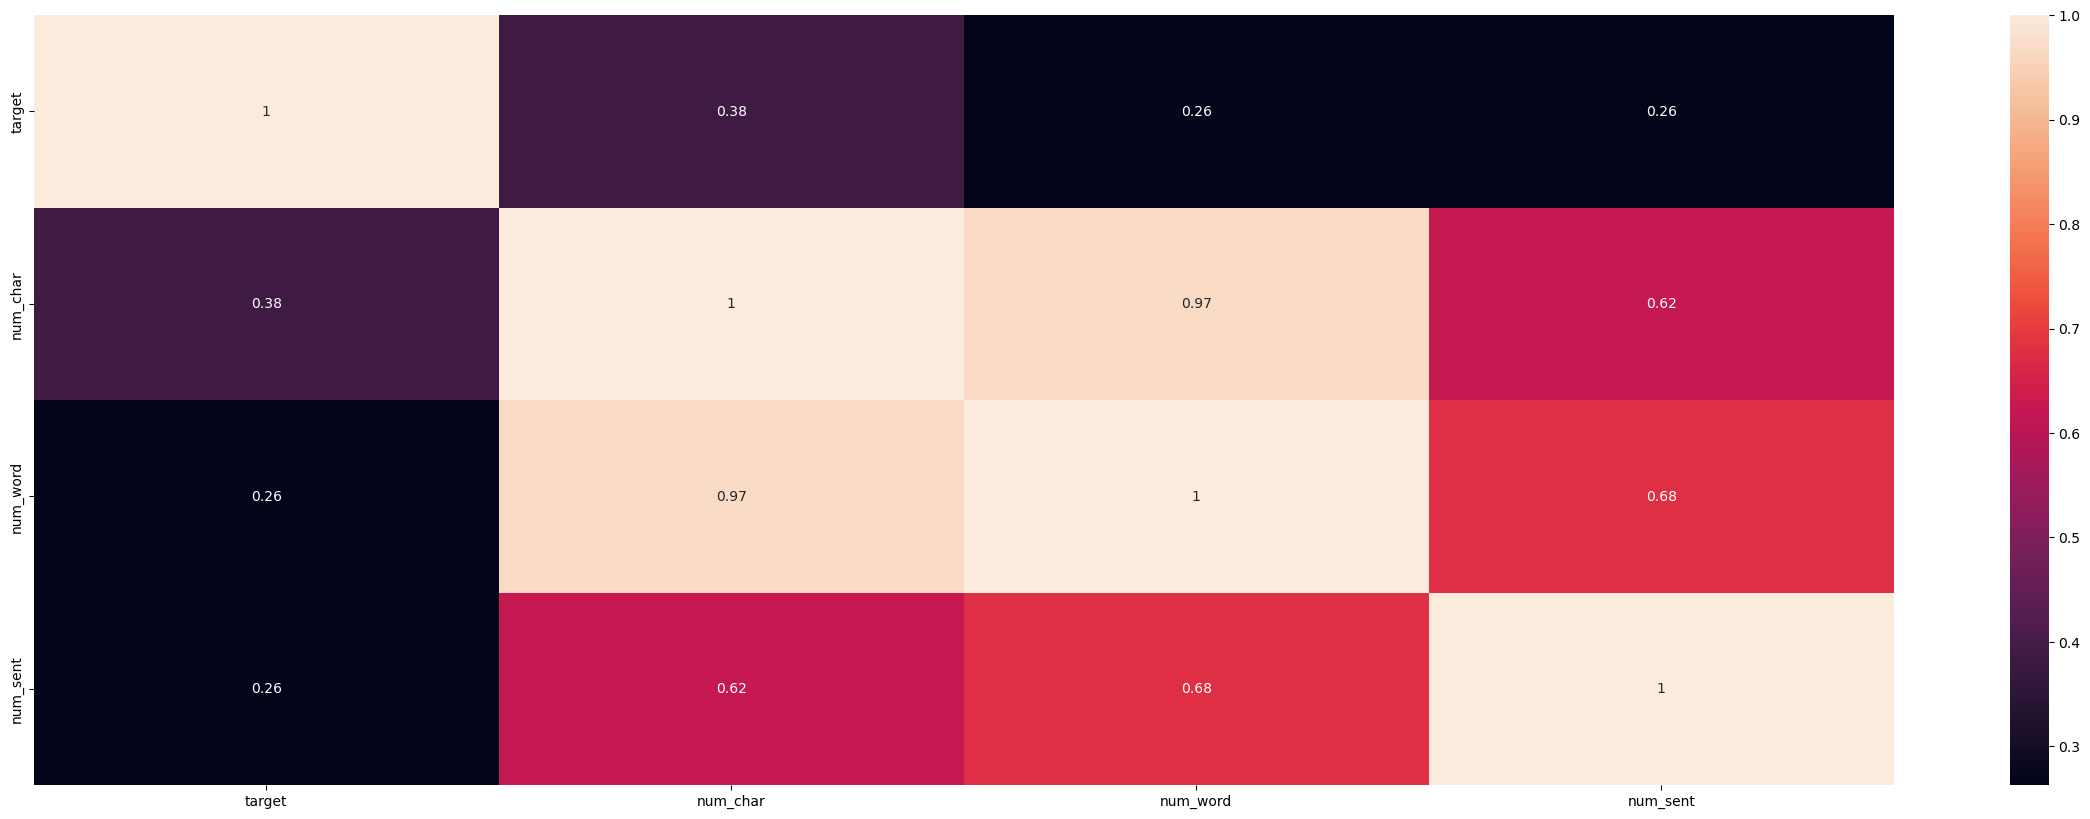

In [131]:
# Plot pairplot and heatmap

# Exclude non-numeric columns for pairplot and heatmap
numeric_df = df[['target', 'num_char', 'num_word', 'num_sent']]

plt.figure(figsize=(30, 10))
sns.pairplot(numeric_df, hue='target')
plt.show()

plt.figure(figsize=(30, 10))
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()


In [132]:
print(df.head())
print(df.describe())

   target                                               text  num_char  \
0       0  Go until jurong point, crazy.. Available only ...       111   
1       0                      Ok lar... Joking wif u oni...        29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...       155   
3       0  U dun say so early hor... U c already then say...        49   
4       0  Nah I don't think he goes to usf, he lives aro...        61   

   num_word  num_sent  
0        24         2  
1         8         2  
2        37         2  
3        13         1  
4        15         1  
            target     num_char     num_word     num_sent
count  5169.000000  5169.000000  5169.000000  5169.000000
mean      0.126330    78.977945    18.455794     1.965564
std       0.332253    58.236293    13.324758     1.448541
min       0.000000     2.000000     1.000000     1.000000
25%       0.000000    36.000000     9.000000     1.000000
50%       0.000000    60.000000    15.000000     1.000000
75%  

In [133]:
# Text preprocessing
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

# Function to transform text
def text_transformer(text):
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    
    words = [word for word in tokens if word.isalnum()]
    
    filtered_words = [word for word in words if word not in stopwords.words('english') and word not in string.punctuation]
    
    stemmed_words = [ps.stem(word) for word in filtered_words]
    
    return " ".join(stemmed_words)

print(df.head(10))

   target                                               text  num_char  \
0       0  Go until jurong point, crazy.. Available only ...       111   
1       0                      Ok lar... Joking wif u oni...        29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...       155   
3       0  U dun say so early hor... U c already then say...        49   
4       0  Nah I don't think he goes to usf, he lives aro...        61   
5       1  FreeMsg Hey there darling it's been 3 week's n...       148   
6       0  Even my brother is not like to speak with me. ...        77   
7       0  As per your request 'Melle Melle (Oru Minnamin...       160   
8       1  WINNER!! As a valued network customer you have...       158   
9       1  Had your mobile 11 months or more? U R entitle...       154   

   num_word  num_sent  
0        24         2  
1         8         2  
2        37         2  
3        13         1  
4        15         1  
5        39         4  
6        18      

In [140]:
# Apply the text transformation function
df['transformed_text'] = df['text'].apply(text_transformer)

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Transform the text data into numerical features
X = vectorizer.fit_transform(df['transformed_text'])


In [141]:
# Define the target variable
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)


LogisticRegression()

In [142]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.9777562862669246
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       889
           1       0.98      0.86      0.92       145

    accuracy                           0.98      1034
   macro avg       0.98      0.93      0.95      1034
weighted avg       0.98      0.98      0.98      1034



In [153]:
# Example usage
sample_text = ["Congratulations! You've won a free ticket to the Bahamas!"]
transformed_sample = vectorizer.transform([text_transformer(sample_text[0])])
prediction = model.predict(transformed_sample)
print("Prediction:", "Spam" if prediction[0] == 1 else "Not Spam")

# Print a specific prediction and its corresponding true value
#print("Prediction:", "Spam" if y_pred[10] == 1 else "Not Spam")
print("True value:", "Spam" if y_test.iloc[1] == 1 else "Not Spam")


Prediction: Not Spam
True value: Not Spam


In [94]:
pip install nltk